In [12]:
#Import Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import keras 

#Initialize Neural Network as Sequential Network
from keras.models import Sequential

from keras.models import model_from_json
#Images are 2D arrays, so import Conv2D. If videos, import 3D with time as the third dimension
from keras.layers import Convolution2D

#Import Max Pooling because we need the highest value pixel from the area of interest
from keras.layers import MaxPooling2D

#Convert 2D arrays into a singular vector
from keras.layers import Flatten

#Perform full connection of neural network
from keras.layers import Dense

#Include random dropout nodes
from keras.layers import Dropout

#import image data generator library
from keras.preprocessing.image import ImageDataGenerator

#Image prepreprocessing
from keras.preprocessing import image

In [13]:

# load json and create model
json_file = open('classifier2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("classifier2.h5")
print("Loaded model from disk")

Loaded model from disk


In [4]:
#Keep training on model?

'not panda'

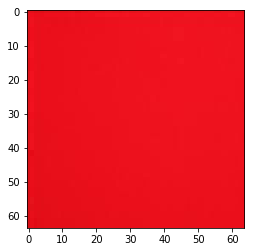

In [5]:
test_image = image.load_img('animal_dataset/prediction_set/red.jpeg', target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = loaded_model.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
elif result[0][0] == 0:
    prediction = 'not panda'
prediction

In [15]:
#Double check accuracy
i = 0
count = 0
for x in os.listdir('animal_dataset/training_set/panda/'):
    if x != '.DS_Store':
        image_path = 'animal_dataset/training_set/panda/' + x

        test_image = image.load_img(image_path, target_size=(64,64))

        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = loaded_model.predict(test_image)

        if result[0][0] == 1:
            prediction = 'panda'
        elif result[0][0] == 0:
            prediction = 'not panda'

        if prediction == 'not panda':
            i += 1
            print(prediction)
            print(image_path)
        if i == 500:
            print('count')
            print(count)
            print('not pandas')
            print(i)
            break
        count += 1
print('count')
print(count)
print('not pandas')
print(i)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


count
1078
not pandas
0
